In [ ]:
#1.

A → C, B

B → A, E

C → A, D

D → C, F

E → B, F

F → D, E

Path : -  A → C → B → D → E → F


In [ ]:
#2.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Student=pd.read_csv('student_scores.csv')
print(Student)

X = Student.drop(columns=['chd'])  
y = Student['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


In [ ]:
#3.
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("winequality-red.csv")

plt.figure(figsize=(10, 6))  # Set figure size
plt.hist(data['alcohol'], bins=15, color='mediumseagreen', edgecolor='black')
plt.title(' Red Wine', fontsize=14)
plt.xlabel('Alcohol Conten', fontsize=12)
plt.ylabel('Number of Wines', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(10, 6))  # Set figure size
plt.scatter(data['citric acid'], data['pH'], color='tomato', alpha=0.7)
plt.title(' Citric Acid  pH ', fontsize=14)
plt.xlabel('Citric Acid', fontsize=12)
plt.ylabel('pH', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
#4.
import numpy as np


X=np.array([
    [2,3,4],
    [3,5,6],
    [5,8,9],
    [6,9,11],
    [7,10,13]
])

mean_X=np.mean(X,axis=0)
print(mean_X)


X_centered=X - mean_X
print(X_centered)


cov_matrix = np.cov(X_centered,rowvar=False)
print(cov_matrix)


eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print(eigenvectors)


sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


X_transformed_1 = X_centered @ eigenvectors[:, 0]


X_transformed_2 = X_centered @ eigenvectors[:, :2]
print("Transformed Data (3 to 1):")
print(X_transformed_1)
print("\nTransformed Data (3 to 2):")
print(X_transformed_2)

In [1]:
#5.
import pandas as pd

data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'area (sq ft)': [1500, 2500, 1200, 1800, 2100, 1600, 2200, 2000, 1700, 1400],
    'bedrooms': [3, 4, 2, 3, 4, 3, 4, 3, 3, 2],
    'bathrooms': [2, 3, 1, 2, 3, 2, 2, 2, 2, 1],
    'location': ['New York', 'San Francisco', 'Chicago', 'New York', 'San Francisco',
                 'Chicago', 'New York', 'Chicago', 'San Francisco', 'New York'],
    'price (in Lakhs)': [120, 300, 90, 150, 280, 100, 250, 110, 275, 130]
}

df = pd.DataFrame(data)

df.to_csv('houseprices.csv', index=False)

df = pd.read_csv('houseprices.csv')

# 1.
print("Number of columns:", df.shape[1])

# 2.
print("\nFirst 5 rows:")
print(df.head())

# 3.
print("\nUnique categories of location:")
print(df['location'].unique())

Number of columns: 6

First 5 rows:
   id  area (sq ft)  bedrooms  bathrooms       location  price (in Lakhs)
0   1          1500         3          2       New York               120
1   2          2500         4          3  San Francisco               300
2   3          1200         2          1        Chicago                90
3   4          1800         3          2       New York               150
4   5          2100         4          3  San Francisco               280

Unique categories of location:
['New York' 'San Francisco' 'Chicago']


In [2]:
#6.

import pandas as pd

data = {
    'Weight (grams)': [150, 120, 180, 80, 85, 90, 200, 210, 190],
    'Size (cm)': [7, 6, 7.5, 5.5, 5, 5.8, 8, 8.5, 7.8],
    'Fruit': ['Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange', 'Banana', 'Banana', 'Banana']
}

df = pd.DataFrame(data)
df.to_csv('fruits.csv', index=False)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

fruits = pd.read_csv('fruits.csv')
print(fruits.head())

le = LabelEncoder()
fruits['Fruit'] = le.fit_transform(fruits['Fruit'])

scaler = MinMaxScaler()
fruits[['Weight (grams)', 'Size (cm)']] = scaler.fit_transform(fruits[['Weight (grams)', 'Size (cm)']])

X = fruits[['Weight (grams)', 'Size (cm)']]
y = fruits['Fruit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_knn(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n--- k = {k} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

for k in [3, 5, 7]:
    train_knn(k)



   Weight (grams)  Size (cm)   Fruit
0             150        7.0   Apple
1             120        6.0   Apple
2             180        7.5   Apple
3              80        5.5  Orange
4              85        5.0  Orange

--- k = 3 ---
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

       Apple       0.00      0.00      0.00         1
      Banana       1.00      1.00      1.00         1
      Orange       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2


--- k = 5 ---
Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

       Apple       0.00      0.00      0.00       1.0
      Banana       0.00      0.00      0.00       1.0
      Orange       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       

c:\Users\vijay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vijay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vijay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [3]:
#7.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , accuracy_score

spam=pd.read_csv('spambase.csv')
print(spam)

from sklearn.model_selection import train_test_split
features = spam.columns.drop('spam')
target = 'spam'
X = spam[features]
y = spam[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,min_samples_split=20,min_impurity_decrease=0.05)
model.fit(X_train,y_train)  
train_accuracy = model.score(X_train,y_train)
test_accuracy = model.score(X_test,y_test)
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_req_our  word_freq_over  word_freq_remove  word_freq_internet  \
0             0.32            0.00              0.00       

In [ ]:
#8.
from sklearn.preprocessing import OrdinalEncoder


df = pd.read_csv('iris.csv')


print("Unique classes before encoding:", df['species'].unique())


encoder = OrdinalEncoder()
df['species_encoded'] = encoder.fit_transform(df[['species']])

print("\nUpdated DataFrame:")
print(df.head())


Unique classes before encoding: ['setosa' 'versicolor' 'virginica']

Updated DataFrame:
   sepal_length  sepal_width  petal_length  petal_width species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   
2           4.7          3.2           1.3          0.2  setosa   
3           4.6          3.1           1.5          0.2  setosa   
4           5.0          3.6           1.4          0.2  setosa   

   species_encoded  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


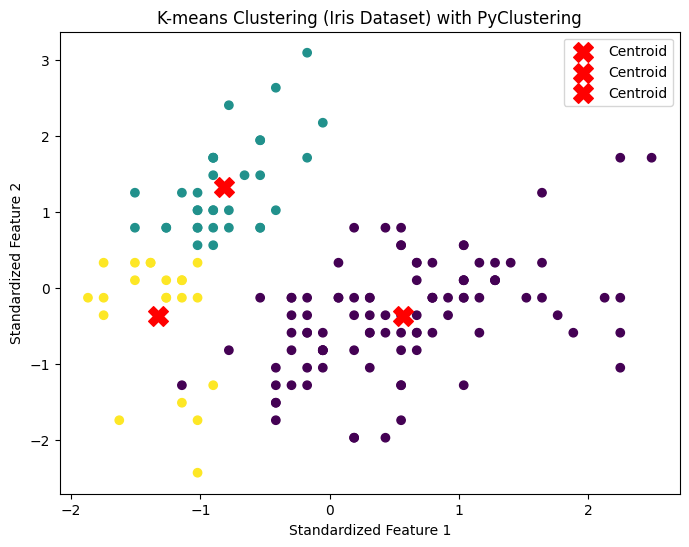

In [5]:
#9.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils import distance_metric, type_metric
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)


iris_df.info()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)


X_scaled_list = X_scaled.tolist()

k = 3


initial_centroids_idx = np.random.choice(len(X_scaled_list), k, replace=False)
initial_centroids_points = [X_scaled_list[i] for i in initial_centroids_idx]

metric = distance_metric(type_metric.EUCLIDEAN)


kmeans_instance = kmeans(X_scaled_list, initial_centroids_points, metric=metric)
kmeans_instance.process()

clusters = kmeans_instance.get_clusters()
centroids = kmeans_instance.get_centers()


cluster_labels = np.zeros(len(X_scaled_list))
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        cluster_labels[index] = cluster_id

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o')
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], s=200, c='red', marker='X', label='Centroid')
plt.title("K-means Clustering (Iris Dataset) with PyClustering")
plt.xlabel("Standardized Feature 1")
plt.ylabel("Standardized Feature 2")
plt.legend()
plt.show()


In [6]:
#10.

import numpy as np

array_1 = np.arange(100, 501)
print("1D Array (100 to 500):\n", array_1)

array_2 = np.random.randint(10, 21, size=(2, 2))
print("2x2  Array (10 to 20):\n", array_2)


average_val = np.mean(array_2)
print("Average  2x2 Array:", average_val)


identity_matrix = np.identity(3)
print("3x3 Identity Matrix:\n", identity_matrix)

subtracted_array = array_1 - 50
print("1D Array after Subtraction (each element - 50):\n", subtracted_array)


1D Array (100 to 500):
 [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 34